In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load the dataset
file_path = 'heart_disease_uci.csv'
heart_disease_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset to understand its structure
heart_disease_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Basic statistics for numerical columns
numerical_stats = heart_disease_data.describe()
numerical_stats

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


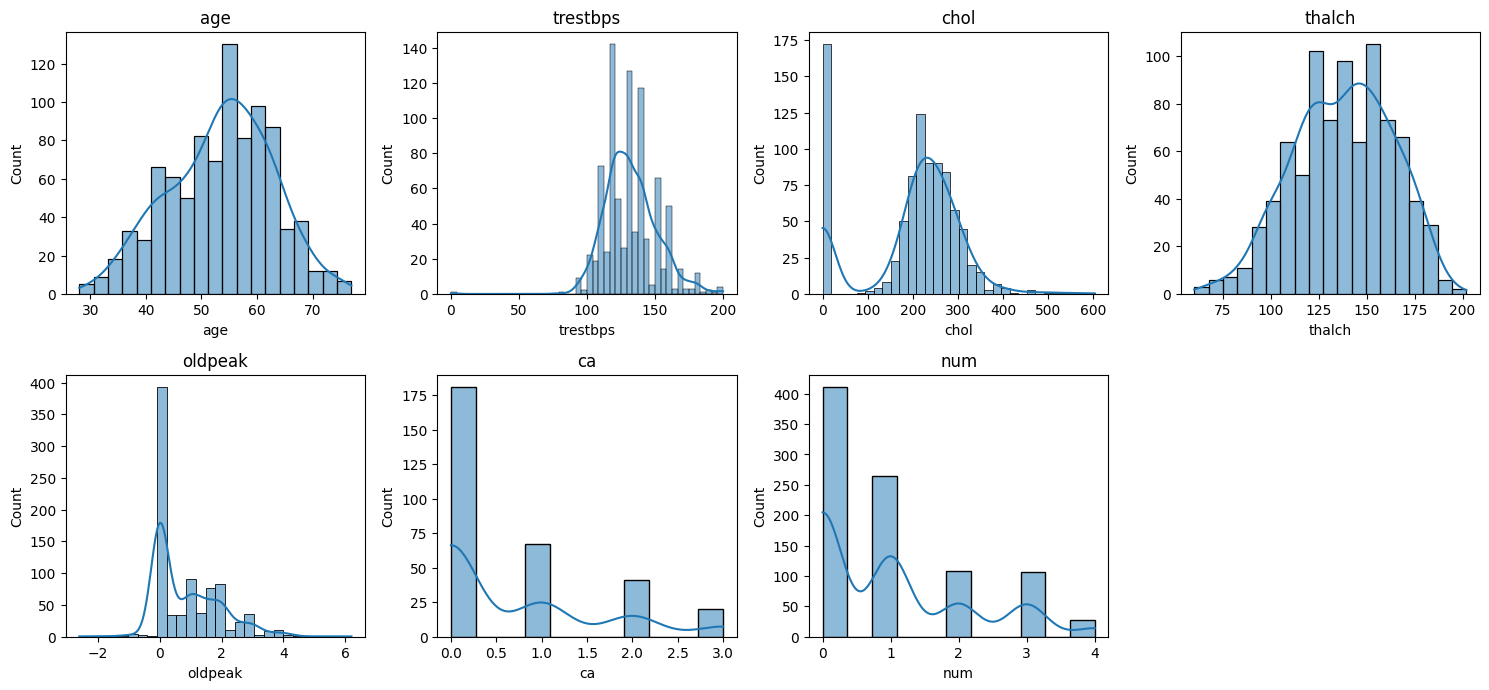

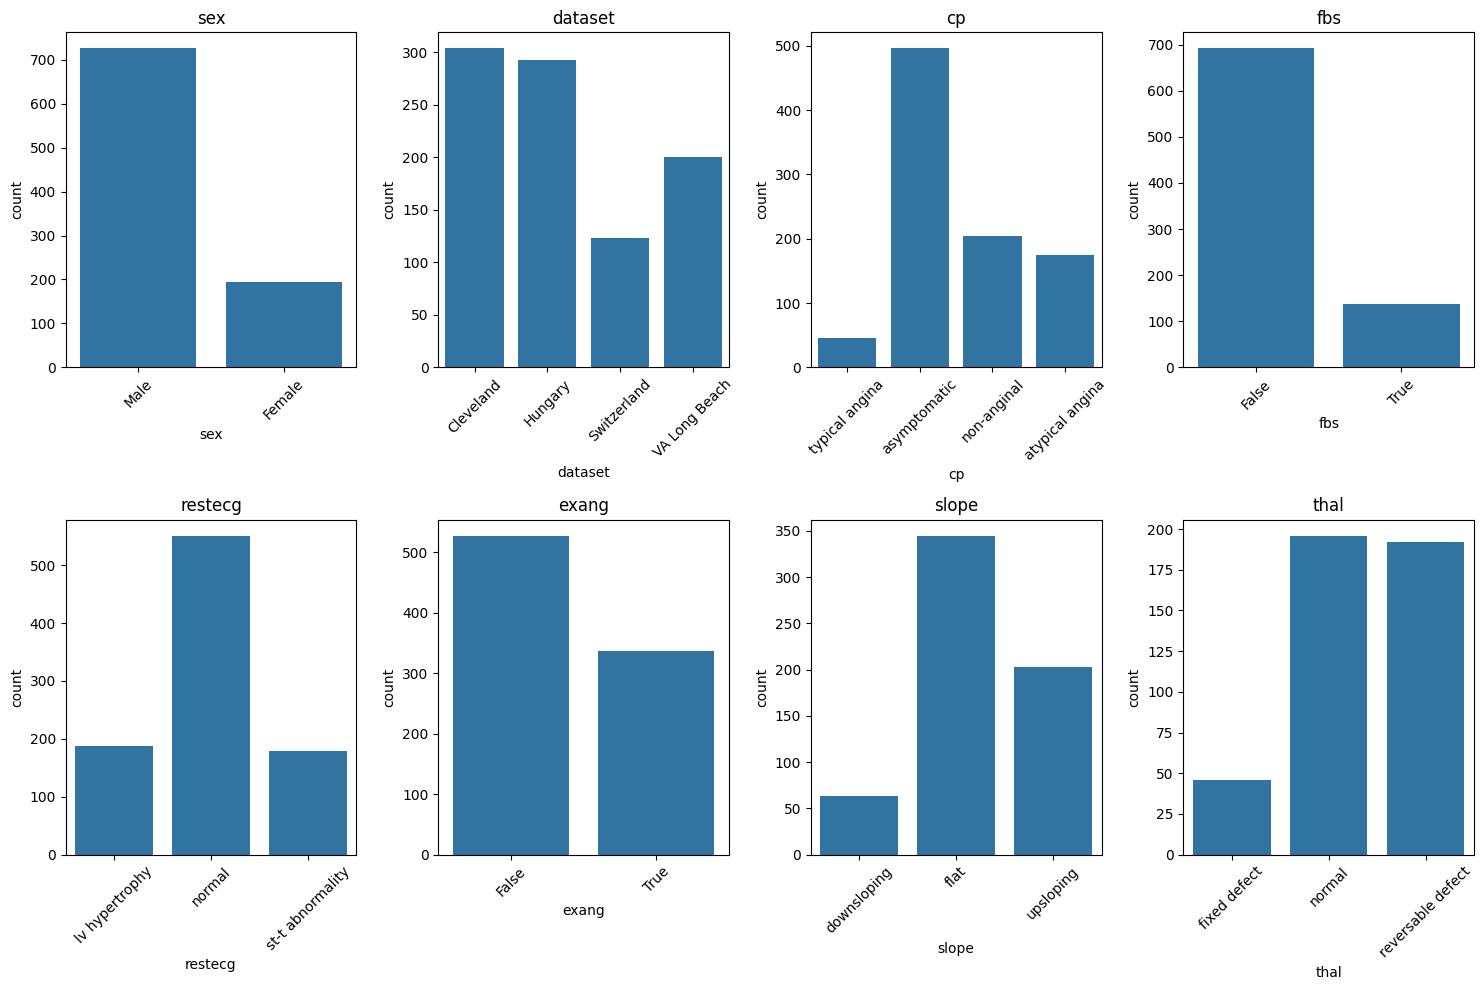

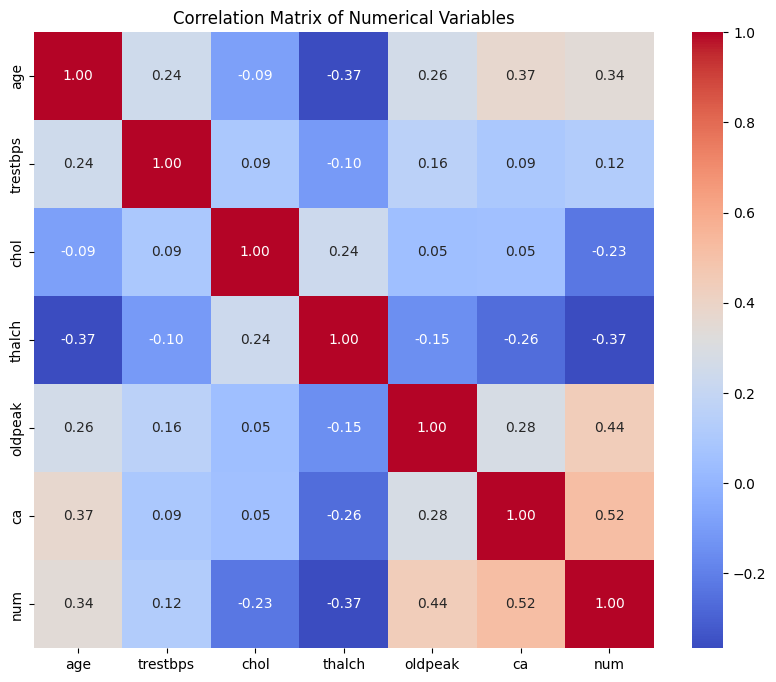

In [6]:
# Select numerical and categorical columns
numerical_columns = heart_disease_data.select_dtypes(include=['int64', 'float64']).columns.drop('id')  # Exclude 'id'
categorical_columns = heart_disease_data.select_dtypes(include=['object']).columns

# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(heart_disease_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plot count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=heart_disease_data)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = heart_disease_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [7]:
# Calculate missing values and their percentage
missing_values = heart_disease_data.isnull().sum()
percentage_missing_values = (missing_values / len(heart_disease_data)) * 100

# Combine both into a DataFrame
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage': percentage_missing_values
})

missing_values_df

,Missing Values,Percentage
id,0,0.000000
age,0,0.000000
sex,0,0.000000
dataset,0,0.000000
cp,0,0.000000
trestbps,59,6.413043
chol,30,3.260870
fbs,90,9.782609
restecg,2,0.217391
thalch,55,5.978261


In [8]:
# Drop columns with more than a certain percentage of missing values
# Here we choose to drop columns with more than 50% missing values
threshold = 0.5  # Threshold for dropping
adjusted_heart_disease_data = heart_disease_data.loc[:, heart_disease_data.isnull().mean() < threshold]

# Review the dataset to ensure missing values are handled
print(adjusted_heart_disease_data.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
num           0
dtype: int64


In [9]:
# Impute missing values for numerical columns
numerical_columns = adjusted_heart_disease_data.select_dtypes(include=['int64', 'float64']).columns
numerical_imputer = SimpleImputer(strategy='median')
adjusted_heart_disease_data.loc[:, numerical_columns] = numerical_imputer.fit_transform(adjusted_heart_disease_data[numerical_columns])

# Impute missing values for categorical columns
categorical_columns = adjusted_heart_disease_data.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
adjusted_heart_disease_data.loc[:, categorical_columns] = categorical_imputer.fit_transform(adjusted_heart_disease_data[categorical_columns])

# Review the dataset to ensure missing values are handled
print(adjusted_heart_disease_data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    adjusted_heart_disease_data.loc[:,col] = label_encoder.fit_transform(adjusted_heart_disease_data[col])

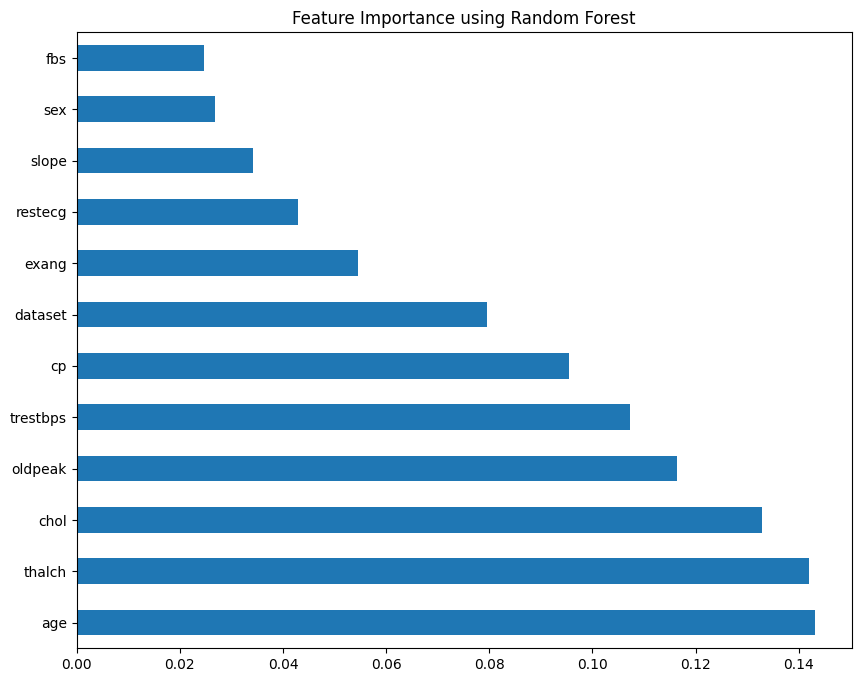

age         0.143131
thalch      0.142080
chol        0.132802
oldpeak     0.116486
trestbps    0.107269
cp          0.095537
dataset     0.079638
exang       0.054609
restecg     0.042850
slope       0.034181
sex         0.026764
fbs         0.024653
dtype: float64

In [15]:
# Separate features and target
X = adjusted_heart_disease_data.drop(['id', 'num'], axis=1)  # 'id' is not a feature, 'num' is the target
y = adjusted_heart_disease_data['num']

# Apply Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Visualize the feature importances
feature_importances_sorted = feature_importances.nlargest(X.shape[1])
feature_importances_sorted.plot(kind='barh', figsize=(10,8))
plt.title('Feature Importance using Random Forest')
plt.show()

# Return the sorted feature importances for further analysis if needed
feature_importances_sorted


In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest class to extract top 10 features
select_k_best = SelectKBest(score_func=f_classif, k=10)
fit = select_k_best.fit(X, y)

# Get scores for each feature
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Print the 10 best features based on ANOVA F-value
top_features = feature_scores.nlargest(10, 'Score')
top_features


,Feature,Score
9,exang,53.425924
10,oldpeak,49.976448
8,thalch,42.141220
3,cp,40.165237
0,age,31.226059
2,dataset,25.088254
1,sex,24.112502
5,chol,18.436526
11,slope,11.587538
6,fbs,4.593743


/var/folders/xp/lyh7b4z17j191_kdj78g_wg80000gn/T/ipykernel_81366/3154592964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=top_features_sorted, orient='h', palette='coolwarm')


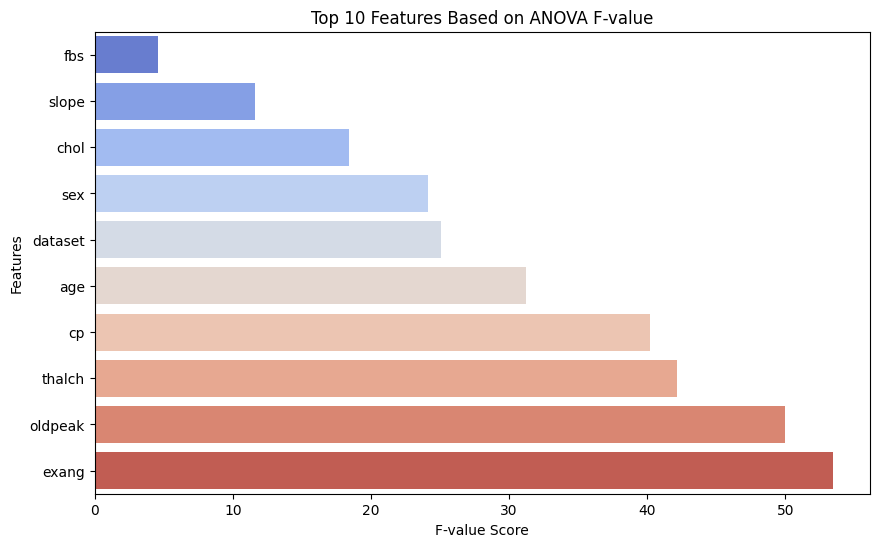

In [28]:
# Sort top features for better visualization
top_features_sorted = top_features.sort_values(by='Score', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=top_features_sorted, orient='h', palette='coolwarm')

plt.title('Top 10 Features Based on ANOVA F-value')
plt.xlabel('F-value Score')
plt.ylabel('Features')

plt.show()